# Part I - Ford GoBike Data Visualization
## by (Olga Kurguzova)

## Introduction

Ford GoBike shares anonymized data about their users’ trips. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime as dt
import datetime
%matplotlib inline

In [2]:
#load csv file and 
go_bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#check go_bikes for visual assessment
go_bikes

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


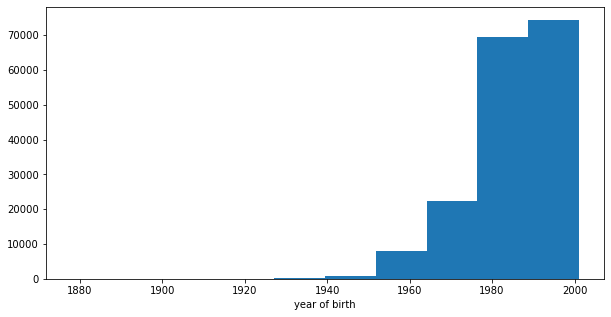

In [4]:
#plot member year of bith distibution
plt.figure(figsize = [10, 5])
plt.hist(data = go_bikes, x = 'member_birth_year')
plt.xlabel('year of birth');

In [5]:
#data info
go_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#check the Null values
go_bikes.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
go_bikes[go_bikes.isnull().any(1)]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [8]:
#Check duplicates
go_bikes.duplicated().sum()

0

In [9]:
#statistic description
go_bikes.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [10]:
go_bikes[go_bikes.duration_sec == 85444]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
101361,85444,2019-02-13 17:59:55.1240,2019-02-14 17:43:59.9540,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,6168,Subscriber,NaN,NaN,No


### Сonclusion after the first checks

 During assessing the data I found some quality and tidiness issues. So I decided to clean up the Dataset before I starting exploration process.
 
 ##### Quality and tidiness issues:

1. Unnecessary columns:`start_station_latitude`,`start_station_longitude`,`end_station_id`,`end_station_latitude`;


2. Drop null-values in columns `start_station_id`, `start_station_name`, `end_station_id`, `end__station_name`, `member_birth_year`;          


3. Erroneous datatypes in columns: `start_time`, `end_time`, `start_station_id`, `end_station_id`, `member_birth_year`;


4. For the purposes of our analysis, we need to create columns with values of starting sharing bikes: weekday and time of the; 


5. For the purposes of our analysis, we need the column with values of the member's age at the time of bike sharing;


6. There are a lot of people over 70 years old and even 118 years old. Most likely, these are outliers, and we need to delete the rows with them;  




### Cleaning Data

#### Issue 1
Drop unnecessary columns

In [11]:
# Make a copy of an original data
go_bikes_clean = go_bikes.copy()

In [12]:
#drop unnecessary columns
go_bikes_clean.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)


In [13]:
# check for the absence of unnecessary columns 
go_bikes_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

#### Issue 2
Drop null-values in columns start_station_id, start_station_name, end_station_id, end__station_name, member_birth_year

In [14]:
#drop null-values
go_bikes_clean = go_bikes_clean.dropna()

In [15]:
#check for the absence of null-values
go_bikes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   end_station_id           174952 non-null  float64
 6   end_station_name         174952 non-null  object 
 7   bike_id                  174952 non-null  int64  
 8   user_type                174952 non-null  object 
 9   member_birth_year        174952 non-null  float64
 10  member_gender            174952 non-null  object 
 11  bike_share_for_all_trip  174952 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 17.4+ MB


#### Issue 3
Correct datatypes for `start_time`, `end_time`. This columns should have datetime type.

In [16]:
# create loop for corection datatypes and droping unnesery values
for c in ['start_time', 'end_time']:
    go_bikes_clean[c] = go_bikes_clean[c].apply(lambda x : x.split ('.')[0])
    go_bikes_clean[c] = pd.to_datetime(go_bikes_clean[c])  

#### Issue 4

Correct datatypes for `start_station_id`, `end_station_id`, `member_birth_year`. 

Correct datatypes for `member_gender` into category type

In [17]:
#create def for convert into  int and category 
       
def multi_astype(data, **column_types):
    for column, typ in column_types.items():
        data[column] = data[column].astype(typ)
        
multi_astype(go_bikes_clean, member_gender='category', 
             start_station_id=int, end_station_id=int, member_birth_year=int)


In [18]:
# check data types
go_bikes_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
end_station_id                      int64
end_station_name                   object
bike_id                             int64
user_type                          object
member_birth_year                   int64
member_gender                    category
bike_share_for_all_trip            object
dtype: object

#### Issue 5

Create new columns `weekday`, `time` to be used in the analysis

In [19]:
# Create weekday column
go_bikes_clean['weekday'] = go_bikes_clean['start_time'].dt.strftime("%A")

# Create time column
go_bikes_clean["time"] = go_bikes_clean['start_time'].dt.hour


In [20]:
# convert weekday into ordered categorical types
ordinal_var_dict = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict)
go_bikes_clean['weekday'] = go_bikes_clean['weekday'].astype(ordered_var)

In [21]:
go_bikes_clean['weekday'].dtypes

CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
, ordered=True)

In [22]:
#check new columns
go_bikes_clean[['weekday','time']].sample(5)

,weekday,time
24549,Monday,18
135428,Friday,12
79148,Monday,17
149131,Wednesday,19
2257,Thursday,18


In [23]:
#transform time in part of the day
b = [0,4,8,12,16,20,24]
l = ['Late Night','Early Morning','Morning','Noon','Evening','Night']
go_bikes_clean['time'] = pd.cut(go_bikes_clean['time'], bins=b, labels=l, include_lowest=True)

In [24]:
#check transformation
go_bikes_clean.time.value_counts()

Evening          52657
Morning          38855
Noon             37894
Early Morning    34617
Night             8765
Late Night        2164
Name: time, dtype: int64

#### Issue 6

We need transform values wrom `member_birth_year` into age and put them into a new column.

In [25]:
# create new column
go_bikes_clean['member_age'] = 2019 - go_bikes_clean['member_birth_year']

In [26]:
#drop unnecessary column
go_bikes_clean.drop(['member_birth_year'], axis=1, inplace=True)

In [27]:
#check for the absence of unnecessary columns
go_bikes_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_gender', 'bike_share_for_all_trip', 'weekday',
       'time', 'member_age'],
      dtype='object')

In [28]:
#check 
go_bikes_clean.member_age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

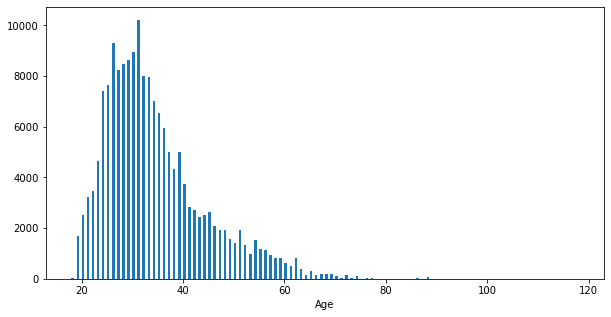

In [29]:
plt.figure(figsize = [10, 5])
bins = np.arange(18, 118 + 0.5, 0.5)
plt.hist(data = go_bikes_clean, x = 'member_age', bins = bins)
plt.xlabel('Age');

#### Issue 7

We need to delete the rows with data of members over 80 years old.

In [30]:
# Delete rows with inappropriate values
go_bikes_clean.drop(go_bikes_clean[go_bikes_clean.member_age >= 80].index, inplace=True)

In [31]:
#Check for the absence of inappropriate values
go_bikes_clean[go_bikes_clean.member_age >= 80]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,weekday,time,member_age


#### Issue 8

We need to replace values 'Yes' and 'No' to 1 and 2 respectively in column `bike_share_for_all_trip`. 

In [32]:
#replace values 
go_bikes_clean.bike_share_for_all_trip.replace('No', 0, inplace = True)
go_bikes_clean.bike_share_for_all_trip.replace('Yes', 1, inplace = True)

In [33]:
go_bikes_clean.bike_share_for_all_trip.value_counts()

0    157457
1     17292
Name: bike_share_for_all_trip, dtype: int64

### Check the improved data specifications

In [34]:
#check the improved data specifications
print(go_bikes_clean.shape)

(174749, 14)


In [35]:
#statistic description
go_bikes_clean.describe()

,duration_sec,start_station_id,end_station_id,bike_id,bike_share_for_all_trip,member_age
count,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000
mean,704.300563,139.024092,136.643683,4482.315183,0.098953,34.122335
std,1643.075498,111.651112,111.352470,1659.248113,0.298600,9.871342
min,61.000000,3.000000,3.000000,11.000000,0.000000,18.000000
25%,323.000000,47.000000,44.000000,3799.000000,0.000000,27.000000
50%,511.000000,104.000000,101.000000,4960.000000,0.000000,32.000000
75%,789.000000,239.000000,238.000000,5505.000000,0.000000,39.000000
max,84548.000000,398.000000,398.000000,6645.000000,1.000000,78.000000


In [36]:
go_bikes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174749 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174749 non-null  int64         
 1   start_time               174749 non-null  datetime64[ns]
 2   end_time                 174749 non-null  datetime64[ns]
 3   start_station_id         174749 non-null  int64         
 4   start_station_name       174749 non-null  object        
 5   end_station_id           174749 non-null  int64         
 6   end_station_name         174749 non-null  object        
 7   bike_id                  174749 non-null  int64         
 8   user_type                174749 non-null  object        
 9   member_gender            174749 non-null  category      
 10  bike_share_for_all_trip  174749 non-null  int64         
 11  weekday                  174749 non-null  category      
 12  time            

### Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "go_bikes_master.csv".

In [37]:
#store the clean DataFrame in a CSV file
go_bikes_master = go_bikes_clean.copy()
go_bikes_master.to_csv('go_bikes_master.csv', 
                 index=False, encoding = 'utf-8')

### What is the structure of your dataset?

There are 174,278 rides with 14 features. This dataset provides detailed rides information for February 2019.
The original dataset has the following information

1. Ride duration: duration of the rides in seconds;
2. Start and End time: when the ride started and ended;
3. Station Information: the station id, name and location;
4. The user information: user id, year of birth, gender, subscription.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out how subscribers and customers use the service in terms of the duration of the ride, frequency of use, their age and gender. 



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that subscribers use the service more often (during day and week), they trips are longer.  

## Univariate Exploration

I'll start by looking at the subscribtion destribution

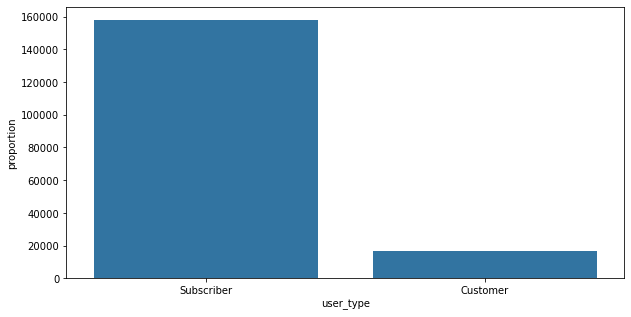

In [38]:
# establish tick locations and create plot
fig, ax = plt.subplots(figsize = (10,5))
base_color = sb.color_palette()[0]
sb.countplot(data = go_bikes_master, x = 'user_type', color = base_color, order = go_bikes_master['user_type'].value_counts().index)
plt.ylabel('proportion');

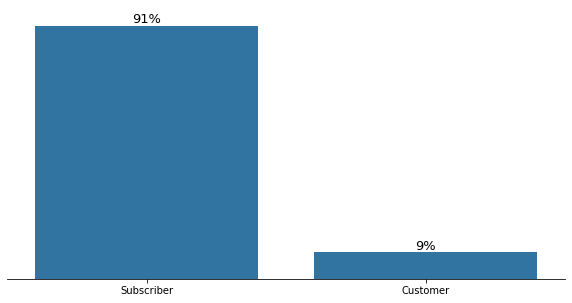

In [65]:
#so, let's add percentages to each bar
fig, ax = plt.subplots(figsize = (10,5))
base_color = sb.color_palette()[0]

sb.countplot(x = "user_type", data = go_bikes_master, 
              order = go_bikes_master['user_type'].value_counts().index,
              color = base_color)

# Calculate % for each user types 
perc_list = []
type_sum = go_bikes_master['user_type'].value_counts().to_list()
total_sum = go_bikes_master.shape[0]
for i in range(0,len(type_sum)):
    percent = int(round(100 * type_sum[i] / total_sum))
    perc_list.append(percent) 
# Annotate bars
i=0
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", color='black', size=13)
    i+=1
plt.ylim([0, 170000])
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlabel("")
sb.despine(fig, left = True);

As we can see on the plot, most of the users (91%) have a subscription.

Let's look at the distribution of the main variable of interest: duration.

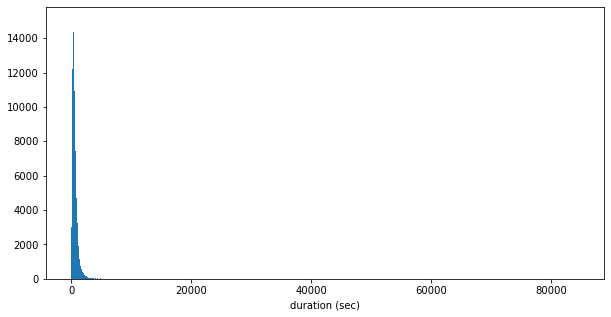

In [40]:
# start with a standard-scaled plot
binsize = 60
bins = np.arange(61, go_bikes_master['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = go_bikes_master, x = 'duration_sec', bins = bins)
plt.xlabel('duration (sec)')
plt.show()

In [41]:
np.log10(go_bikes_master['duration_sec'].describe())

count    5.242415
mean     2.847758
std      3.215658
min      1.785330
25%      2.509203
50%      2.708421
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

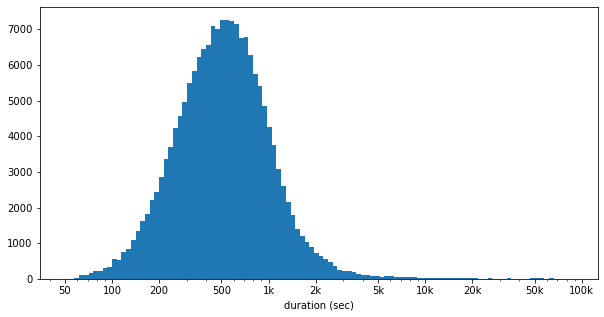

In [42]:
# there is a very long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.03
bins = 10 ** np.arange(1.7, np.log10(go_bikes_master['duration_sec'].max())+log_binsize, log_binsize)
tick = [50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5]
label = [50, 100, 200, 500, '1k', '2k', '5k', '10k', '20k','50k', '100k']

plt.figure(figsize=[10, 5])
plt.hist(data = go_bikes_master, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(tick, label)
plt.xlabel('duration (sec)')
plt.show()

Duration has a very long-tailed distribution, most trips lasted from 120 seconds (2 minutes) to 2000 seconds (around 33 minutes), and some trips lasted much longer (almost 24 hours). 
When plotted on a log-scale, the duration distribution looks unimodal, with a single peak between 400 and 700 seconds (7 - 12 minutes). 

Let's look at the gender destribution. Who uses the bike sharing service most often - a men or a women?

In [43]:
# Compute proportion
sum_gender = go_bikes_master['member_gender'].value_counts().sum()
gender_counts = go_bikes_master['member_gender'].value_counts()
max_gend_count = gender_counts[0]
max_prop = max_gend_count/sum_gender

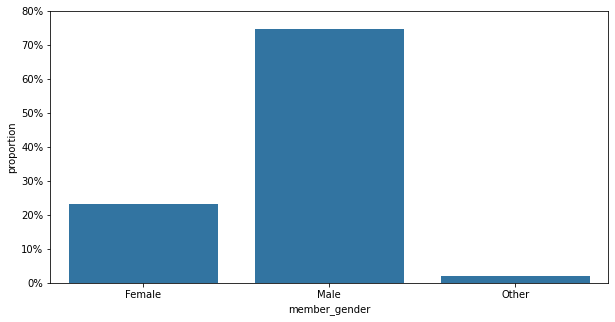

In [44]:
# establish tick locations and create plot
fig, ax = plt.subplots(figsize = (10,5))
tick_props = np.arange(0, max_prop +0.1, 0.1)
tick_names = [f'{int(v*100)}%' for v in tick_props]
ax = sb.countplot(data = go_bikes_master, x = 'member_gender', color = base_color)
plt.yticks(tick_props * sum_gender, tick_names)
plt.ylabel('Proportion');

According to the plot, the majority of members around 75% are male, around 25% are female and around 1% are others. 

Move on to age destribution.  People of what age are more likely to use the bike sharing service?

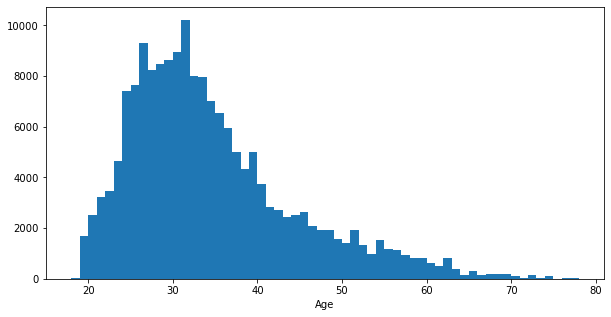

In [45]:
# create plot
binsize = 1
bins = np.arange(18, go_bikes_master['member_age'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = go_bikes_master, x = 'member_age', bins = bins)
plt.xlabel('Age')
plt.show()

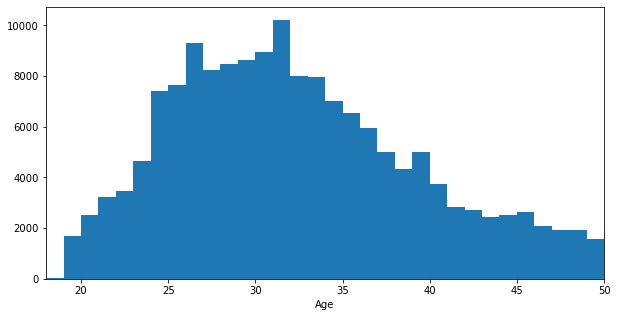

In [46]:
#let's zoom the plot
binsize = 1
bins = np.arange(18, go_bikes_master['member_age'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = go_bikes_master, x = 'member_age', bins = bins)
plt.xlabel('Age')
plt.xlim([18, 50])
plt.show()

According to the plot, the distribution is more concentrated between 25 and 35 years old.

At the end of this section we will take a look at period of day and weekday. When the most popular time to share bike?

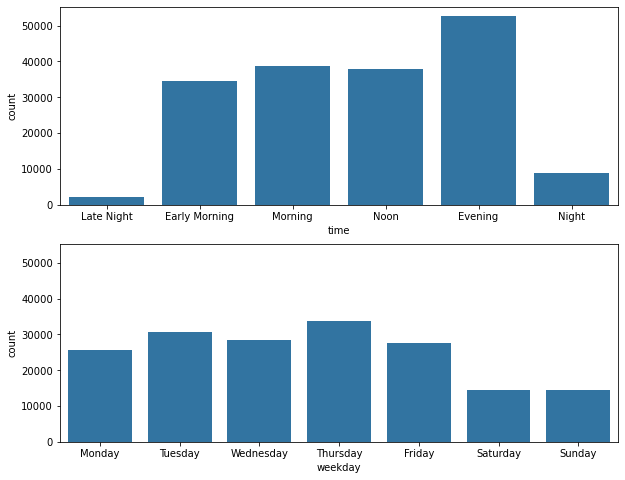

In [47]:
fig, ax = plt.subplots(nrows=2, figsize = [10, 8])

ax1 = sb.countplot(data = go_bikes_master, x = 'time', color = base_color, ax = ax[0])
sb.countplot(data = go_bikes_master, x = 'weekday', color = base_color, ax = ax[1])
plt.ylim(ax1.get_ylim())
plt.show()

As we can see on the "time" bar chart, the number of trips during the day is distributed evenly, but in the evening it increases by almost a third. However, Night is not a popular time for cycling


On the weekday bar plot, we can see that weekdays are much more popular than weekends, especially on Thursday.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

First of all, most of the users (91%) have a subscription.
Than I explored the duration variable. It took a large range of values, so I used a log transformation for the data. Under the transformation, the data looked unimodal, with a single peak between 400 and 700 seconds (7 - 12 minutes).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I extracted data about the start time of the trip and the day of the week when the trip starts from the "start time" to see the most popular time of using the service. 
In column year of birth were outliers, so I decidet to remove them also I converted the "year of birth" column to the "age" column for the convenience of information perception.
The duration variable took a large range of values, so I used a log transformation for the data. Under the transformation, the data looked unimodal, with a single peak between 400 and 700 seconds (7 - 12 minutes).

## Bivariate Exploration

First, Let's look at the relationship between two numeric variables the duration of the trip and the age of the members.

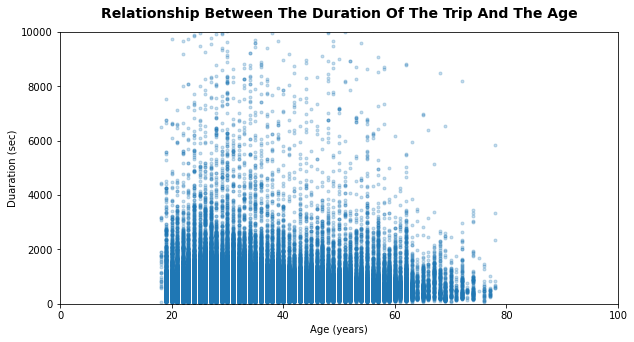

In [48]:
#let's plot scatterplot
plt.figure(figsize=[10,5])
plt.scatter(data = go_bikes_master, x = 'member_age', y='duration_sec', alpha = 0.25, marker = '.' )
plt.axis([0, 100, 0, 1e4])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.title('Relationship Between The Duration Of The Trip And The Age', 
               y=1.03, fontsize=14, fontweight='semibold')
plt.show()

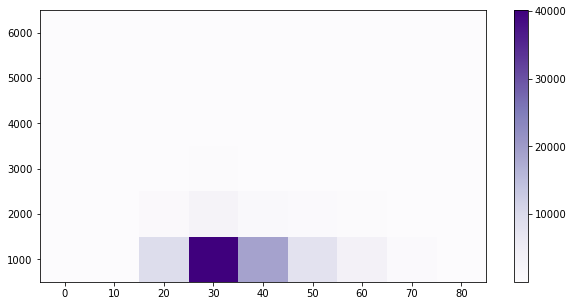

In [49]:
#the plot above looks a bit messy, let's use a heat map to depict the data.
plt.figure(figsize=[10,5])
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d(data = go_bikes_master, x = 'member_age', y='duration_sec',
           bins = [bins_x, bins_y], cmap ='Purples')
plt.colorbar(ticks=[1e4, 2e4, 3e4, 4e4])
plt.show()

The relationship between the two variables is negative. Visualization shows that the longest trips were made by people aged 25 to 35 years. As we already know, this age group is the most popular among users.  

Now, let's look at relationship between the numeric variables - duration of the trip and categorical variables - subscriptions

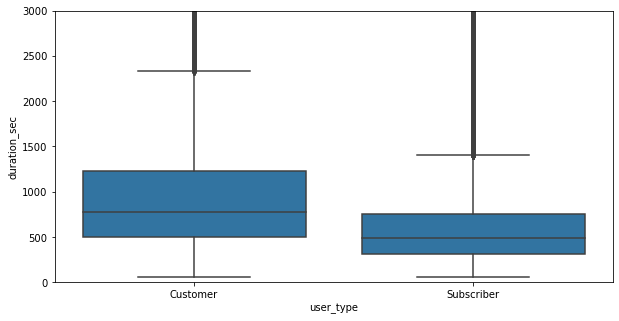

In [50]:
fig, ax = plt.subplots(figsize = (10,5))
sb.boxplot(data=go_bikes_master, x='user_type', y='duration_sec', color=base_color)
plt.ylim([0, 3e3])
plt.show()

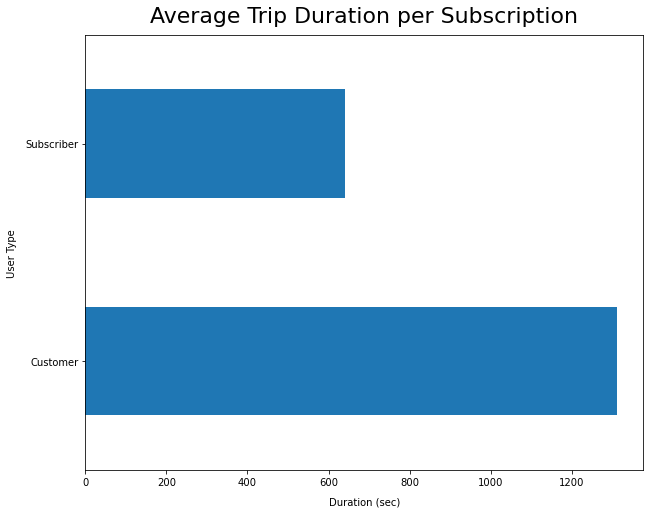

In [51]:
#let's create bar charwith the average duration of trips
ax = go_bikes_master.groupby('user_type')['duration_sec'].mean().plot(kind='barh', figsize=(10,8))
ax.set_title('Average Trip Duration per Subscription', fontsize=22, y=1.015)
ax.set_ylabel('User Type', labelpad=8)
ax.set_xlabel('Duration (sec)', labelpad=10);

Visualization shows that on average, customers took longer rides than subscribers.

let's look at relationship between members age and subscriptions

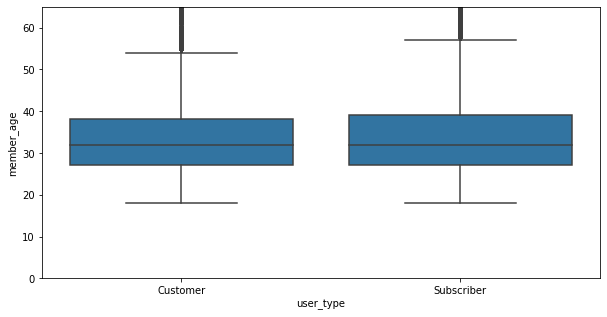

In [52]:
fig, ax = plt.subplots(figsize = (10,5))
sb.boxplot(data=go_bikes_master, x='user_type', y='member_age', color=base_color)
plt.ylim([0, 65])
plt.title('', 
               y=1.03, fontsize=14, fontweight='semibold')
plt.show()

It seems that both groups have the same age distribution

Next, let's look at how subscribers and non-subscribers use the service during day and week

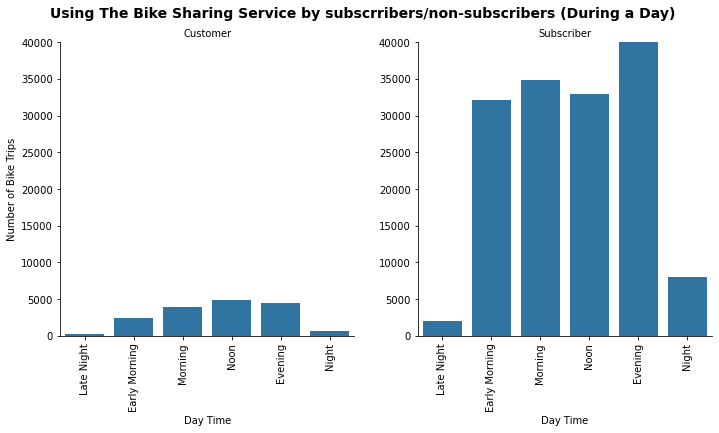

In [53]:
#let's plot the difference in the use of the service during the day
g = sb.catplot(data=go_bikes_master, x='time', col='user_type', kind='count', sharex = True, sharey = False,
            color = base_color)
g.set_axis_labels('Day Time', 'Number of Bike Trips')
g.set_titles("{col_name}")
g.fig.suptitle('Using The Bike Sharing Service by subscrribers/non-subscribers (During a Day)',
               y=1.03, fontsize=14, fontweight='semibold')
g.set_xticklabels(rotation=90)
g.set(ylim=(0, 4e4));

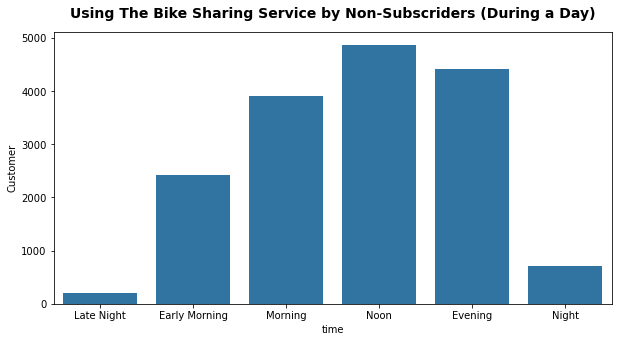

In [54]:
#let's zoom the plot for customers
n_time_cust = go_bikes_master.groupby(['time', 'user_type']).size()
n_time_cust = n_time_cust.reset_index(name='count')
n_time_cust = n_time_cust.pivot(index = 'time', columns = 'user_type', values = 'count')
n_time_cust=n_time_cust.reset_index()

plt.figure(figsize = (10,5))
sb.barplot(data=n_time_cust, x='time', y='Customer', color=base_color)
plt.title('Using The Bike Sharing Service by Non-Subscriders (During a Day)', 
               y=1.03, fontsize=14, fontweight='semibold')
plt.show()

As we already know, subscribers exceed the number of non-subscribers, so we see this in the graphs above. Subscribers used the service from early morning to evening, and customers mostly use the service closer to noon and at evening. Both groups rarely use the service at night.

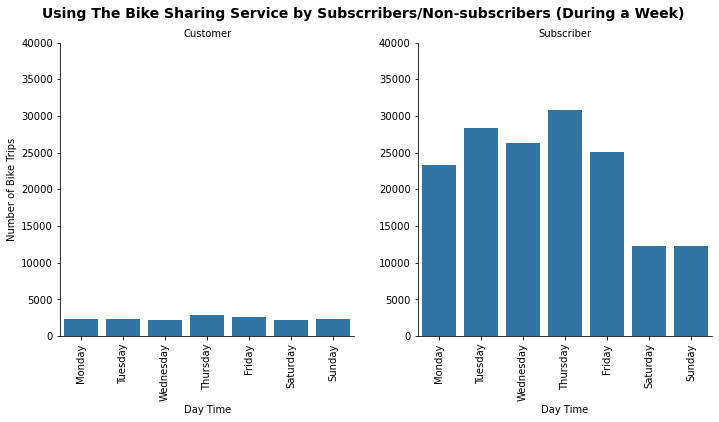

In [55]:
#let's plot the difference in the use of the service during the week
g = sb.catplot(data=go_bikes_master, x='weekday', col='user_type', kind='count', sharex = True, sharey = False,
            color = base_color)
g.set_axis_labels('Day Time', 'Number of Bike Trips')
g.set_titles("{col_name}")
g.fig.suptitle('Using The Bike Sharing Service by Subscrribers/Non-subscribers (During a Week)', 
               y=1.03, fontsize=14, fontweight='semibold')
g.set_xticklabels(rotation=90)
g.set(ylim=(0, 4e4));

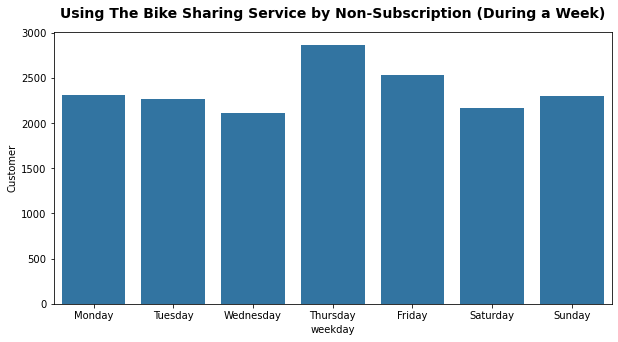

In [56]:
#let's zoom the plot for customers
n_week_cust = go_bikes_master.groupby(['weekday', 'user_type']).size()
n_week_cust = n_week_cust.reset_index(name='count')
n_week_cust = n_week_cust.pivot(index = 'weekday', columns = 'user_type', values = 'count')
n_week_cust=n_week_cust.reset_index()

plt.figure(figsize = (10,5))
sb.barplot(data=n_week_cust, x='weekday', y='Customer', color=base_color)
plt.title('Using The Bike Sharing Service by Non-Subscription (During a Week)', 
               y=1.03, fontsize=14, fontweight='semibold')
plt.show()

Subscribers most often used the service on working days, in contrast to customers who used the service throughout  a week. Interestingly, both groups used the service most on Thursday, perhaps this is due to the fact that February 14 was on Thursday.

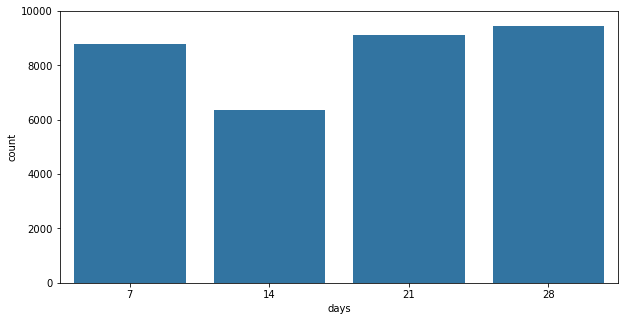

In [57]:
#so, let's check this assumption
# sort data by Thursdays
thursdays = go_bikes_master.query('weekday =="Thursday"').copy()
thursdays['days'] = thursdays['start_time'].dt.strftime("%d")
thursdays['days'] = thursdays['days'].astype(int)

plt.figure(figsize = (10,5))
sb.countplot(data = thursdays, x = 'days', color = base_color)
plt.ylim([0, 10e3])
plt.show()

This assumption was not confirmed, on February 14, fewer trips were made than on other Thursdays.

Let's look at the gender distribution by user type

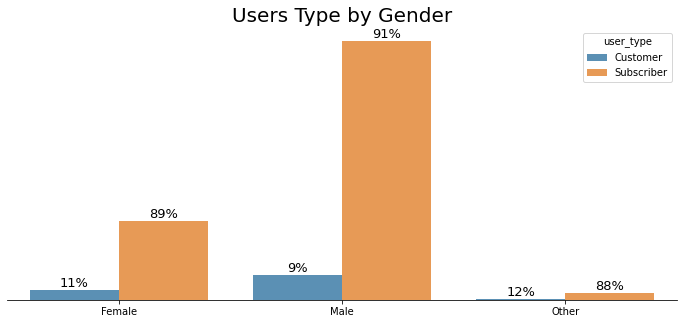

In [58]:
fig, ax = plt.subplots(figsize = (12,5))
sb.countplot(data = go_bikes_master, x = 'member_gender', 
               hue = "user_type", alpha = 0.8)
# Percentage for each gender
perc_list_customer, perc_list_subscriber, perc_list = [], [], []
type_sum = go_bikes_master.groupby('member_gender')['user_type'].value_counts().sort_index().to_list()
total_sum = go_bikes_master['member_gender'].value_counts().sort_index().to_list()

# arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# annotate each bar
i=0
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", color='black', size=13)
    i+=1

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sb.despine(fig, left = True)
plt.title('Users Type by Gender', fontsize= 20)
plt.xlabel('');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Subscribers used the service more often from early morning until the end of the working day, mainly on working days. This may mean that they used the service for commuting or for work. Customers used the service throughout a week. Interestingly, both groups used the service most on Thursday. I assumed that this was due to the fact that February 14 is Thursday, but this assumption was not confirmed. In addition, it was unexpected to find that customers made longer trips than subscribers

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The longest trips were made by people aged 25 to 35 years

## Multivariate Exploration

First, I will analyze the distributions between customer and subscriber, depending on gender and usage on weekdays.

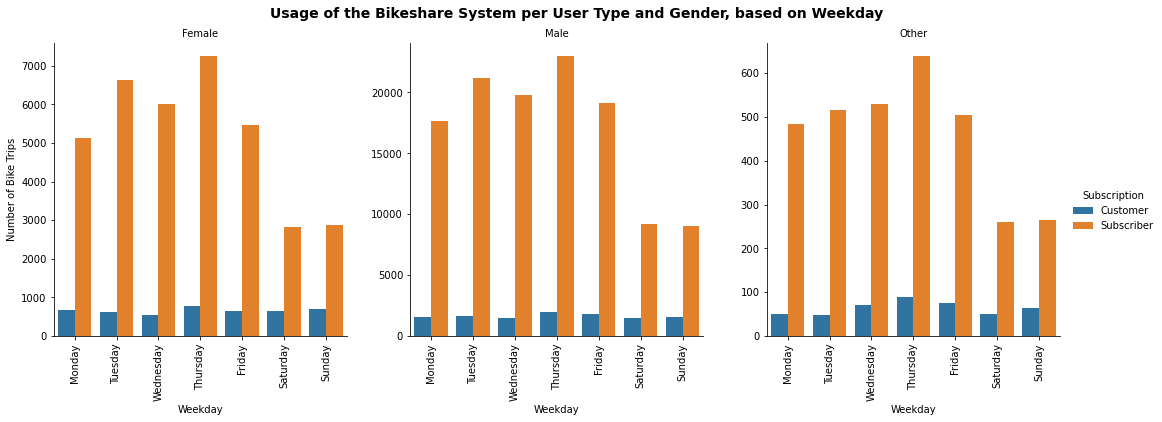

In [59]:
#let's plot
g = sb.catplot(data=go_bikes_master, x='weekday', col='member_gender', hue='user_type', 
               kind='count', sharey = False)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g._legend.set_title('Subscription')
g.set_titles("{col_name}")
g.fig.suptitle('Usage of the Bikeshare System per User Type and Gender, based on Weekday', 
               y=1.03, fontsize=14, fontweight='semibold')
g.set_xticklabels(rotation=90);

The distribution of the number of trips made by women corresponds to the distribution of the number of trips made by men

Now, I will analyze the distributions between customer and subscriber, depending on gender and usage during the day.

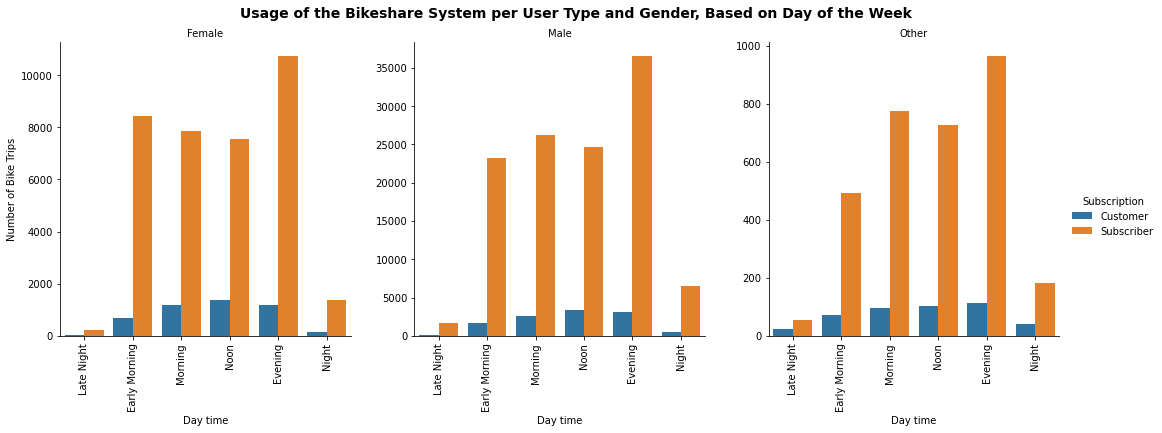

In [60]:
#create faceted plot
g = sb.catplot(data=go_bikes_master, x='time', col='member_gender', hue='user_type', 
               kind='count', sharey = False)
g.set_axis_labels("Day time", "Number of Bike Trips")
g._legend.set_title('Subscription')
g.set_titles("{col_name}")
g.fig.suptitle('Usage of the Bikeshare System per User Type and Gender, Based on Day of the Week', 
               y=1.03, fontsize=14, fontweight='semibold')
g.set_xticklabels(rotation=90);

It seems that women with subscriptions started their trips earlier than men.

Let's create a heat map to visualize when trips most often start among subscribers and customers

In [61]:
# create dataframe for subscriber
subscriber = go_bikes_master.query('user_type == "Subscriber"').groupby(['time','weekday']
                                                                      ).agg({'bike_id' : 'count'})
subscriber = subscriber.pivot_table(index='weekday', columns='time', values='bike_id')
# create dataframe for customer
customer = go_bikes_clean.query('user_type == "Customer"').groupby(['weekday','time']).agg({'bike_id' : 'count'})
customer = customer.pivot_table(index='weekday', columns='time', values='bike_id')

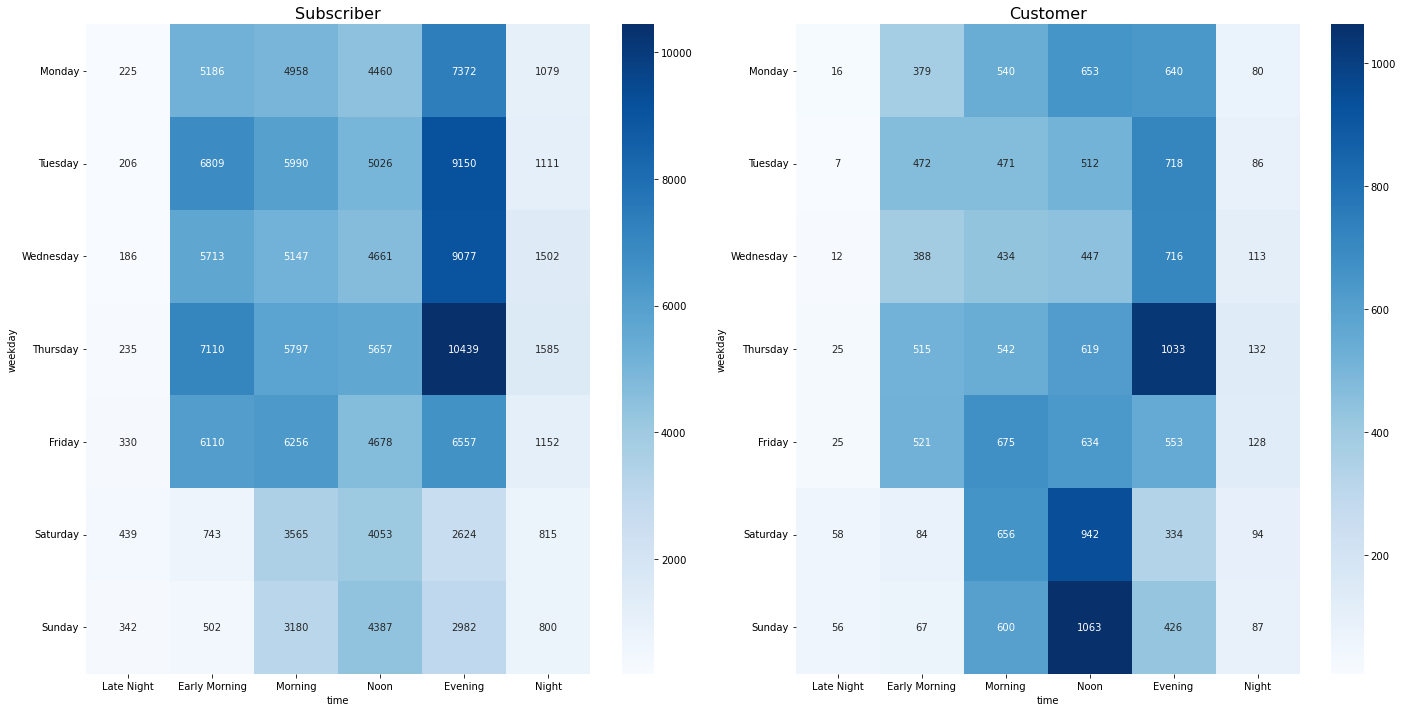

In [62]:
#plot heatmap
plt.subplots(figsize=(20,10))

fig1 = plt.subplot(1,2,1)
ax1 = sb.heatmap(subscriber, annot=True, fmt='d', cmap='Blues')

plt.title('Subscriber',size=16)
plt.yticks(rotation=360)

fig2 = plt.subplot(1,2,2)
ax2 = sb.heatmap(customer, annot=True, fmt='d', cmap='Blues')

plt.title('Customer',size=16)
plt.yticks(rotation=360)
plt.tight_layout();

According to the heatmat above, subscribers used the service more often in the evening - the most popular time to use the service was Thursday evening.
Customers used the service mainly in the evening as subscribers, but also on weekends afternoon. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Multivariate charts have strengthened the previously observed relationships. Subscribers most often used the service on weekdays (especially in the evening), and customers preferred to use the bike sharing service on weekends. It was almost unaffected by gender.

### Were there any interesting or surprising interactions between features?

Interestingly, women with subscriptions started their trips earlier than men.


## Conclusions
1. Most of users Ford GoBike service are subscribers (91%);


2. The majority of users are men both among subscribers and customers;


3. The majority of users are people between the ages of 25 and 35, both among subscribers and customers;


4. Subscribers mostly use the service during the working week, especially in the evening, while customers use the service throughout the week, especially around noon on weekends. Perhaps subscribers used the service to travel to work or at work, and customers for entertainment. It is worth noting that the trips of customers on average lasted much longer.